In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
campañasIniciales=10

In [3]:
Carpeta=r"C:\Users\williamtorres\OneDrive - CETCO S.A\Rolling forecast\Corrida 09.06.2025"

# Uniendo Corporativo menos PR

In [4]:
df_Linea=  pd.read_excel(Carpeta+'\\Resultado CORP\\Rolling-Forecast.XLSM', sheet_name='Final')
df_Linea.head()

,Ce.,Grupo art.,Crecimiento X+1,Crecimiento X,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,CO03,106,0.014352,-0.063517,0,200036215,0,0,0,0,...,704,758,707,733,717,750,848,855,856,202610
1,CO03,106,0.014352,-0.063517,0,210092104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202610
2,CO03,106,0.014352,-0.063517,0,210093082,0,0,0,0,...,655,706,658,682,667,697,788,794,795,202610
3,CO03,106,0.014352,-0.063517,0,210093312,122,0,0,0,...,161,173,161,167,163,170,192,194,194,202610
4,CO03,106,0.014352,-0.063517,0,210094410,0,489,468,0,...,461,497,463,480,470,491,555,559,560,202610


In [5]:
df_NovoApp=  pd.read_excel(Carpeta+'\\Resultado CORP\\novoAppForecast.XLSM', sheet_name='Final')
df_NovoApp.head()

,Ce.,Grupo art.,Crecimiento X+2,Crecimiento X+3,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,BO03,101,0.037674,0.034939,0,200115806,1488,504,679,707,...,1355,1355,1355,1355,1355,1355,1355,1355,1355,202612
1,BO03,101,0.037674,0.034939,0,200115820,468,29,595,179,...,0,0,0,0,0,0,0,0,0,202610
2,BO03,101,0.037674,0.034939,0,200117098,371,20,1257,125,...,782,782,782,782,782,782,782,782,782,202612
3,BO03,101,0.037674,0.034939,0,200117127,480,606,1520,1762,...,603,603,603,603,603,603,603,603,603,202610
4,BO03,101,0.037674,0.034939,0,200117264,228,221,234,1020,...,945,945,945,945,945,945,945,945,945,202613


In [6]:
df_Linea = df_Linea.drop(df_Linea.columns[[2, 3, 4]], axis=1)
df_Linea.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,CO03,106,200036215,0,0,0,0,576,0,0,...,704,758,707,733,717,750,848,855,856,202610
1,CO03,106,210092104,0,0,0,0,220,209,0,...,0,0,0,0,0,0,0,0,0,202610
2,CO03,106,210093082,0,0,0,0,219,0,0,...,655,706,658,682,667,697,788,794,795,202610
3,CO03,106,210093312,122,0,0,0,0,0,0,...,161,173,161,167,163,170,192,194,194,202610
4,CO03,106,210094410,0,489,468,0,0,0,0,...,461,497,463,480,470,491,555,559,560,202610


In [7]:
df_NovoApp = df_NovoApp.drop(df_NovoApp.columns[[2, 3, 4]], axis=1)
df_NovoApp.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,BO03,101,200115806,1488,504,679,707,1047,629,1596,...,1355,1355,1355,1355,1355,1355,1355,1355,1355,202612
1,BO03,101,200115820,468,29,595,179,1624,0,0,...,0,0,0,0,0,0,0,0,0,202610
2,BO03,101,200117098,371,20,1257,125,567,2,961,...,782,782,782,782,782,782,782,782,782,202612
3,BO03,101,200117127,480,606,1520,1762,1006,2429,598,...,603,603,603,603,603,603,603,603,603,202610
4,BO03,101,200117264,228,221,234,1020,356,880,233,...,945,945,945,945,945,945,945,945,945,202613


In [8]:
df_PronosticoCOR= pd.concat([df_NovoApp, df_Linea], ignore_index=True)

In [9]:
df_PronosticoCOR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13399 entries, 0 to 13398
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ce.                     13399 non-null  object
 1   Grupo art.              13399 non-null  int64 
 2   Código SAP              13399 non-null  int64 
 3   202601                  13399 non-null  int64 
 4   202602                  13399 non-null  int64 
 5   202603                  13399 non-null  int64 
 6   202604                  13399 non-null  int64 
 7   202605                  13399 non-null  int64 
 8   202606                  13399 non-null  int64 
 9   202607                  13399 non-null  int64 
 10  202608                  13399 non-null  int64 
 11  202609                  13399 non-null  int64 
 12  202610                  13399 non-null  int64 
 13  202611                  13399 non-null  int64 
 14  202612                  13399 non-null  int64 
 15  20

# Uniendo  PR

In [10]:
df_Linea=  pd.read_excel(Carpeta+'\\Resultado PR03\\Rolling-Forecast.XLSM', sheet_name='Final')
df_Linea.head()

,Ce.,Grupo art.,Crecimiento X+1,Crecimiento X,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,106,0.014352,-0.063517,0,210098324,0,101,17,60,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,104,0.037174,0.074587,0,200116053,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,104,0.037174,0.074587,0,200116055,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,104,0.037174,0.074587,0,200116057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,104,0.037174,0.074587,0,200116629,48,0,101,0,...,0,0,0,0,0,0,0,0,0,202612


In [11]:
df_NovoApp=  pd.read_excel(Carpeta+'\\Resultado PR03\\novoAppForecast.XLSM', sheet_name='Final')
df_NovoApp.head()

,Ce.,Grupo art.,Crecimiento X+2,Crecimiento X+3,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,0.037674,0.034939,0,200115806,229,229,229,229,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,101,0.037674,0.034939,0,200115820,84,84,84,84,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,101,0.037674,0.034939,0,200117098,91,91,91,91,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,101,0.037674,0.034939,0,200117127,95,95,95,95,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,101,0.037674,0.034939,0,200117264,260,260,260,260,...,0,0,0,0,0,0,0,0,0,202612


In [12]:
df_Linea = df_Linea.drop(df_Linea.columns[[2, 3, 4]], axis=1)
df_Linea.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,106,210098324,0,101,17,60,61,61,0,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,104,200116053,0,0,0,0,0,21,0,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,104,200116055,0,0,0,0,0,34,0,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,104,200116057,0,0,0,0,0,43,0,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,104,200116629,48,0,101,0,135,0,0,...,0,0,0,0,0,0,0,0,0,202612


In [13]:
df_NovoApp = df_NovoApp.drop(df_NovoApp.columns[[2, 3, 4]], axis=1)
df_NovoApp.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,200115806,229,229,229,229,229,229,229,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,101,200115820,84,84,84,84,84,84,84,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,101,200117098,91,91,91,91,91,91,91,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,101,200117127,95,95,95,95,95,0,0,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,101,200117264,260,260,260,260,260,260,260,...,0,0,0,0,0,0,0,0,0,202612


In [14]:
df_PronosticoPR= pd.concat([df_NovoApp, df_Linea], ignore_index=True)

In [15]:
df_PronosticoPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ce.                     963 non-null    object
 1   Grupo art.              963 non-null    int64 
 2   Código SAP              963 non-null    int64 
 3   202601                  963 non-null    int64 
 4   202602                  963 non-null    int64 
 5   202603                  963 non-null    int64 
 6   202604                  963 non-null    int64 
 7   202605                  963 non-null    int64 
 8   202606                  963 non-null    int64 
 9   202607                  963 non-null    int64 
 10  202608                  963 non-null    int64 
 11  202609                  963 non-null    int64 
 12  202610                  963 non-null    int64 
 13  202611                  963 non-null    int64 
 14  202612                  963 non-null    int64 
 15  202613

# Uniendo PR y COR

In [16]:
df_Pronostico = pd.concat([df_PronosticoCOR, df_PronosticoPR], ignore_index=True, sort=False)

In [17]:
df_Pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14362 entries, 0 to 14361
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ce.                     14362 non-null  object 
 1   Grupo art.              14362 non-null  int64  
 2   Código SAP              14362 non-null  int64  
 3   202601                  14362 non-null  int64  
 4   202602                  14362 non-null  int64  
 5   202603                  14362 non-null  int64  
 6   202604                  14362 non-null  int64  
 7   202605                  14362 non-null  int64  
 8   202606                  14362 non-null  int64  
 9   202607                  14362 non-null  int64  
 10  202608                  14362 non-null  int64  
 11  202609                  14362 non-null  int64  
 12  202610                  14362 non-null  int64  
 13  202611                  14362 non-null  int64  
 14  202612                  14362 non-null

In [18]:
df_Pronostico=df_Pronostico.fillna(0)
df_Pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14362 entries, 0 to 14361
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ce.                     14362 non-null  object 
 1   Grupo art.              14362 non-null  int64  
 2   Código SAP              14362 non-null  int64  
 3   202601                  14362 non-null  int64  
 4   202602                  14362 non-null  int64  
 5   202603                  14362 non-null  int64  
 6   202604                  14362 non-null  int64  
 7   202605                  14362 non-null  int64  
 8   202606                  14362 non-null  int64  
 9   202607                  14362 non-null  int64  
 10  202608                  14362 non-null  int64  
 11  202609                  14362 non-null  int64  
 12  202610                  14362 non-null  int64  
 13  202611                  14362 non-null  int64  
 14  202612                  14362 non-null

# Limpiando Data

In [19]:
Categoria=df_Pronostico['Grupo art.'].unique()
print(Categoria)
CDP=df_Pronostico['Ce.'].unique()
print(CDP)

[101 102 104 105 103 106]
['BO03' 'CL03' 'CO03' 'CR03' 'DO03' 'EC03' 'GT23' 'MX03' 'PA33' 'PE03'
 'SV13' 'PR03']


In [20]:
añoActual = datetime.now().year

In [21]:
df_Pronostico.columns = df_Pronostico.columns.astype(str)

In [22]:
# Iterar sobre los años desde el año actual hasta 4 años después
for i in range(añoActual, añoActual + 4):  # +5 para incluir hasta añoActual + 4
    # Filtrar columnas que inician con el año actual en la iteración
    columnas_AñoX = [col for col in df_Pronostico.columns if col.startswith(str(i))]
    
    # Si hay columnas de ese año, sumarlas en una nueva columna
    if columnas_AñoX:
        df_Pronostico['Total_' + str(i)] = df_Pronostico[columnas_AñoX].sum(axis=1)


In [23]:
# Mostrar el DataFrame actualizado
df_Pronostico.head()


,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling,Total_2026,Total_2027,Total_2028
0,BO03,101,200115806,1488,504,679,707,1047,629,1596,...,1355,1355.0,1355.0,1355.0,1355.0,1355.0,202612,19939.0,23562.0,24390.0
1,BO03,101,200115820,468,29,595,179,1624,0,0,...,0,0.0,0.0,0.0,0.0,0.0,202610,2895.0,0.0,0.0
2,BO03,101,200117098,371,20,1257,125,567,2,961,...,782,782.0,782.0,782.0,782.0,782.0,202612,10613.0,13608.0,14076.0
3,BO03,101,200117127,480,606,1520,1762,1006,2429,598,...,603,603.0,603.0,603.0,603.0,603.0,202610,14547.0,10494.0,10854.0
4,BO03,101,200117264,228,221,234,1020,356,880,233,...,945,945.0,945.0,945.0,945.0,945.0,202613,12484.0,16434.0,17010.0


# Calculando Total por Categoría

In [24]:
Valores=['Total_'+str(añoActual+1),'Total_'+str(añoActual+2),'Total_'+str(añoActual+3)]
tabla_pivot_Pronostico = df_Pronostico.pivot_table(
    index='Grupo art.',  # Índice (Filas)
    values=Valores,  # Valores a mostrar
    aggfunc='sum'  # Función de agregación (suma por defecto)
)
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Grupo art.,,,
101,86321369.0,96997835.0,100299244.0
102,59137280.0,60303757.0,62346210.0
103,52199186.0,58716300.0,60701413.0
104,13668015.0,13235319.0,13689214.0
105,13947909.0,16104286.0,16649531.0


In [25]:
Traduciones = {
    "Grupo art.": [101, 102, 103, 104, 105, 106],
    "Categoría": [
        "Fragancias",
        "Maquillaje",
        "Cuidado Personal",
        "Tratamiento Facial",
        "Tratamiento Corporal",
        "Accesorios Cosméticos",
    ],
}
df_Traducciones = pd.DataFrame(Traduciones)
tabla_final = tabla_pivot_Pronostico.merge(df_Traducciones, on="Grupo art.", how="left")

In [26]:
tabla_final = tabla_final.set_index("Categoría")[Valores]
tabla_pivot_Pronostico=tabla_final

In [27]:
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Categoría,,,
Fragancias,86321369.0,96997835.0,100299244.0
Maquillaje,59137280.0,60303757.0,62346210.0
Cuidado Personal,52199186.0,58716300.0,60701413.0
Tratamiento Facial,13668015.0,13235319.0,13689214.0
Tratamiento Corporal,13947909.0,16104286.0,16649531.0


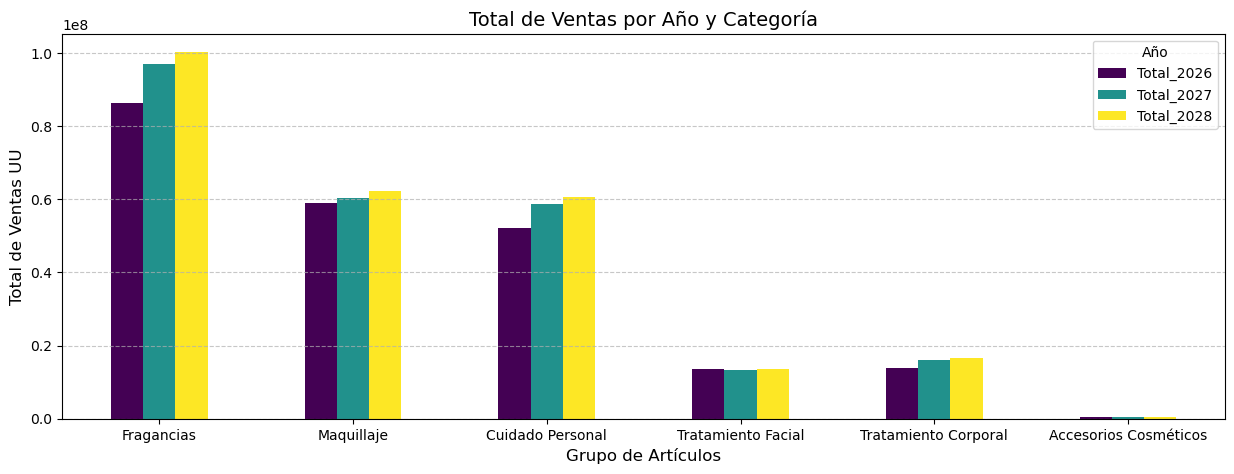

In [28]:
# Graficar la tabla dinámica
tabla_pivot_Pronostico.plot(kind='bar', figsize=(15, 5), colormap='viridis')

# Personalizar la gráfica
plt.title('Total de Ventas por Año y Categoría', fontsize=14)
plt.xlabel('Grupo de Artículos', fontsize=12)
plt.ylabel('Total de Ventas UU', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas de categorías horizontales
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar la gráfica
plt.show()

# Calculando por CDP

In [29]:
Valores=['Total_'+str(añoActual+1),'Total_'+str(añoActual+2),'Total_'+str(añoActual+3)]
tabla_pivot_Pronostico = df_Pronostico.pivot_table(
    index='Ce.',  # Índice (Filas)
    values=Valores,  # Valores a mostrar
    aggfunc='sum'  # Función de agregación (suma por defecto)
)
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Ce.,,,
BO03,5590395.0,6593754.0,6815968.0
CL03,18142652.0,19019565.0,19666916.0
CO03,71202721.0,80816620.0,83559688.0
CR03,6995574.0,7398419.0,7648332.0
DO03,11477059.0,13616324.0,14076076.0


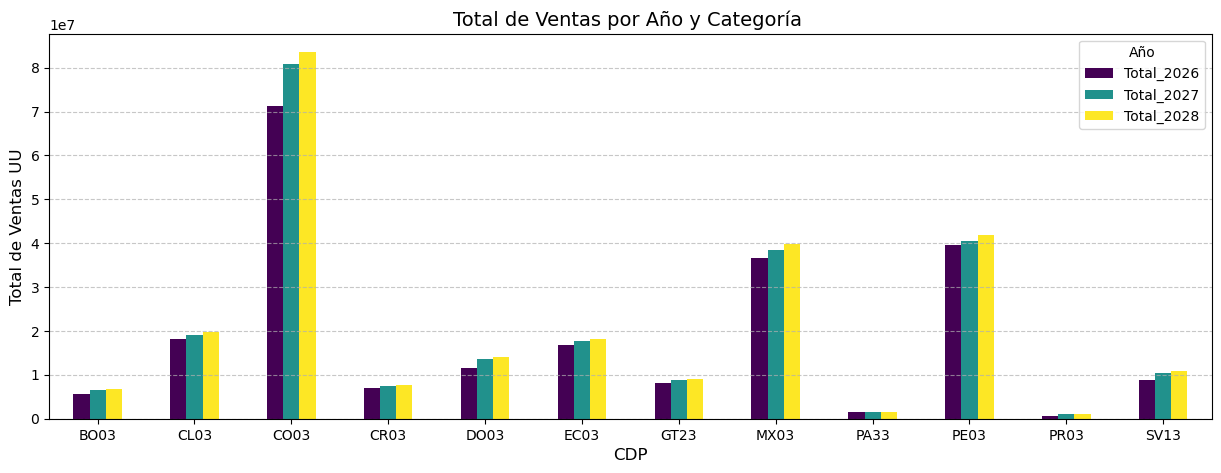

In [30]:
# Graficar la tabla dinámica
tabla_pivot_Pronostico.plot(kind='bar', figsize=(15, 5), colormap='viridis')

# Personalizar la gráfica
plt.title('Total de Ventas por Año y Categoría ', fontsize=14)
plt.xlabel('CDP', fontsize=12)
plt.ylabel('Total de Ventas UU', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas de categorías horizontales
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

In [31]:
tabla_pivot_Pronostico

,Total_2026,Total_2027,Total_2028
Ce.,,,
BO03,5590395.0,6593754.0,6815968.0
CL03,18142652.0,19019565.0,19666916.0
CO03,71202721.0,80816620.0,83559688.0
CR03,6995574.0,7398419.0,7648332.0
DO03,11477059.0,13616324.0,14076076.0
EC03,16772902.0,17658530.0,18256940.0
GT23,8190809.0,8783483.0,9080414.0
MX03,36577200.0,38479606.0,39790460.0
PA33,1561255.0,1502660.0,1552495.0


# Calculando códigos activos por campaña y categoría

In [32]:
df_agrupado = df_PronosticoCOR.groupby(["Código SAP"]).sum().reset_index()

In [33]:
df_agrupado.head()

,Código SAP,Ce.,Grupo art.,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,200036215,CO03PE03CL03BO03CR03DO03,636,0,0,0,0,2357,0,0,...,2761,2973,2772,2875,2813,2940,3325,3352,3356,1215660
1,200039855,CO03PE03MX03EC03CL03BO03GT23SV13CR03DO03PA33,1111,112952,95083,145225,70737,125060,127160,97977,...,177216,190889,177986,184609,180677,188867,213569,215276,215603,2228710
2,200041645,MX03EC03GT23SV13,424,0,0,0,234,1257,0,0,...,1824,1965,1832,1900,1859,1943,2197,2214,2217,810440
3,200060753,MX03,101,4239,1436,366,0,1189,1878,1584,...,3019,3252,3032,3145,3078,3218,3639,3668,3674,202610
4,200060760,CO03PE03MX03EC03CL03BO03GT23SV13CR03DO03PA33,1111,59497,42360,40494,34637,40635,36868,40091,...,55913,60226,56155,58244,57004,59587,67380,67917,68020,2228710


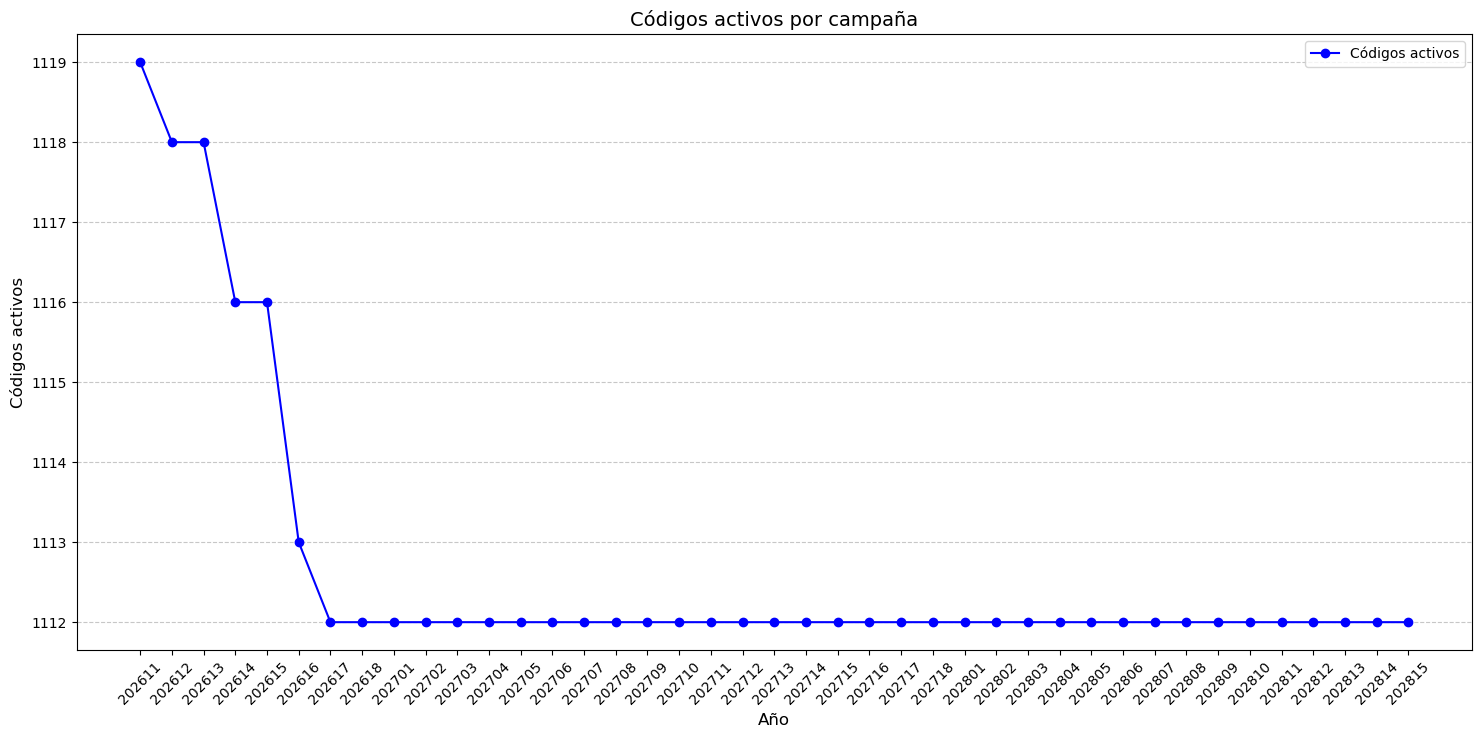

In [34]:

# Contar valores diferentes de 0 por columna
conteo_no_ceros = (df_agrupado.iloc[:, 3+campañasIniciales:] != 0).sum()
conteo_no_ceros = conteo_no_ceros[:-4]
conteo_no_ceros.index = conteo_no_ceros.index.astype(str)
# Crear la gráfica de línea
# FORZAR que se muestren todas las etiquetas en el eje X

plt.figure(figsize=(18, 8))
plt.plot(conteo_no_ceros.index, conteo_no_ceros, marker='o', color='b', label="Códigos activos")
plt.title("Códigos activos por campaña", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Códigos activos", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Mostrar la gráfica
plt.show()